#### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

In [2]:
import warnings
warnings.filterwarnings('ignore')

#### Read Data

In [3]:
df = pd.read_csv('./bank.csv')

In [4]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [5]:
df=df.drop(columns=['month','day'])
df=df.drop_duplicates()
df = pd.get_dummies(df)
df = df.drop(columns=['default_no', 'housing_no', 'loan_no', 'deposit_no'])

df.head(5).T

,0,1,2,3,4
age,59,56,41,55,54
balance,2343,45,1270,2476,184
duration,1042,1467,1389,579,673
campaign,1,1,1,1,2
pdays,-1,-1,-1,-1,-1
previous,0,0,0,0,0
job_admin.,True,True,False,False,True
job_blue-collar,False,False,False,False,False
job_entrepreneur,False,False,False,False,False
job_housemaid,False,False,False,False,False


In [6]:
X = df.drop('deposit_yes', axis=1)
y = df['deposit_yes']
X.shape, y.shape

((11162, 35), (11162,))

## Exploratory Data Analysis (EDA)

**Tasks:**

1. Check Summary Statistics for the Dataset
2. Check Distribution Of Classes
3. Check Correlation Matrix
4. Check For Outliers
5. Visualize Data After Dimension Reduction


### 1. Check Summary Statistics for the Dataset

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,11162.0,41.231948,11.913369,18.0,32.0,39.0,49.00,95.0
balance,11162.0,1528.538524,3225.413326,-6847.0,122.0,550.0,1708.00,81204.0
duration,11162.0,371.993818,347.128386,2.0,138.0,255.0,496.00,3881.0
campaign,11162.0,2.508421,2.722077,1.0,1.0,2.0,3.00,63.0
pdays,11162.0,51.330407,108.758282,-1.0,-1.0,-1.0,20.75,854.0
previous,11162.0,0.832557,2.292007,0.0,0.0,0.0,1.00,58.0


### 2. Check Distribution Of Classes

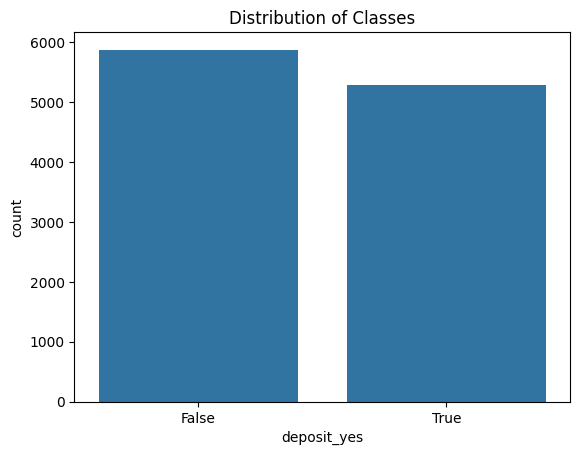

In [8]:
sns.countplot(x=df['deposit_yes'])
plt.title("Distribution of Classes")
plt.show()

### 3. Check Correlation Matrix

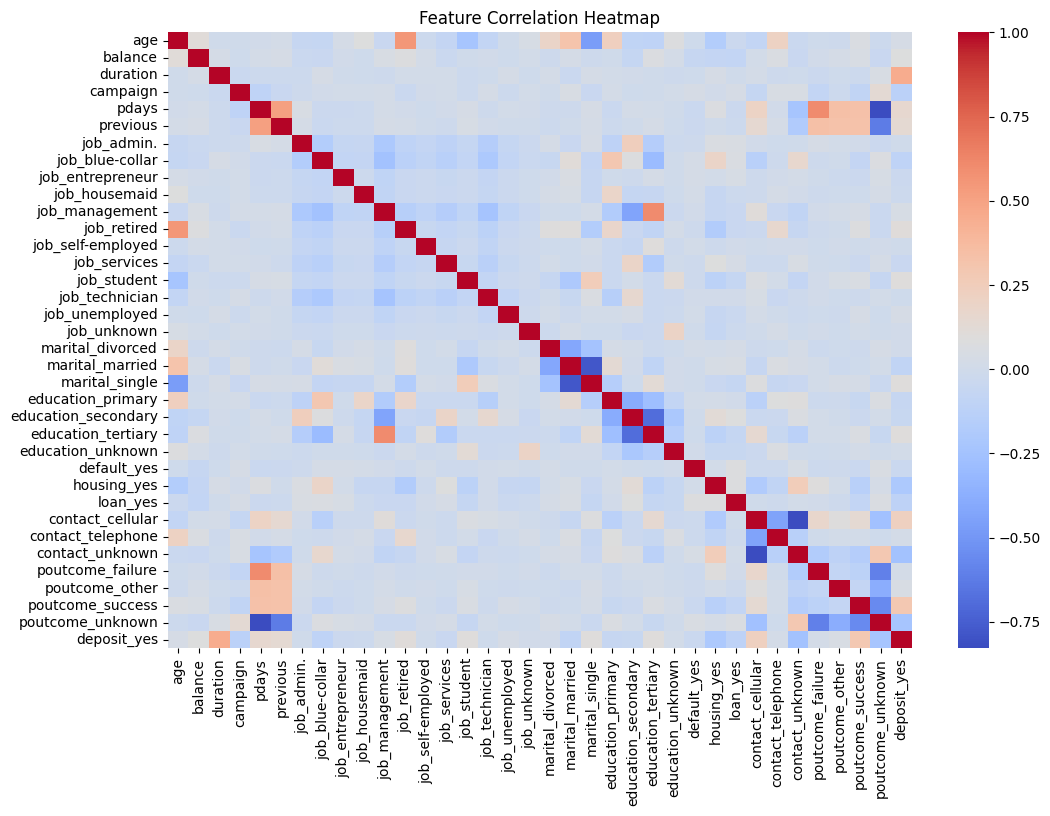

In [9]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

### 4. Check For Outliers

In [10]:
missing_values = df.isnull().sum()
print(missing_values)

age                    0
balance                0
duration               0
campaign               0
pdays                  0
previous               0
job_admin.             0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_unknown            0
marital_divorced       0
marital_married        0
marital_single         0
education_primary      0
education_secondary    0
education_tertiary     0
education_unknown      0
default_yes            0
housing_yes            0
loan_yes               0
contact_cellular       0
contact_telephone      0
contact_unknown        0
poutcome_failure       0
poutcome_other         0
poutcome_success       0
poutcome_unknown       0
deposit_yes            0
dtype: int64


#### Boxplot of Numeric Features for Detecting Outlier

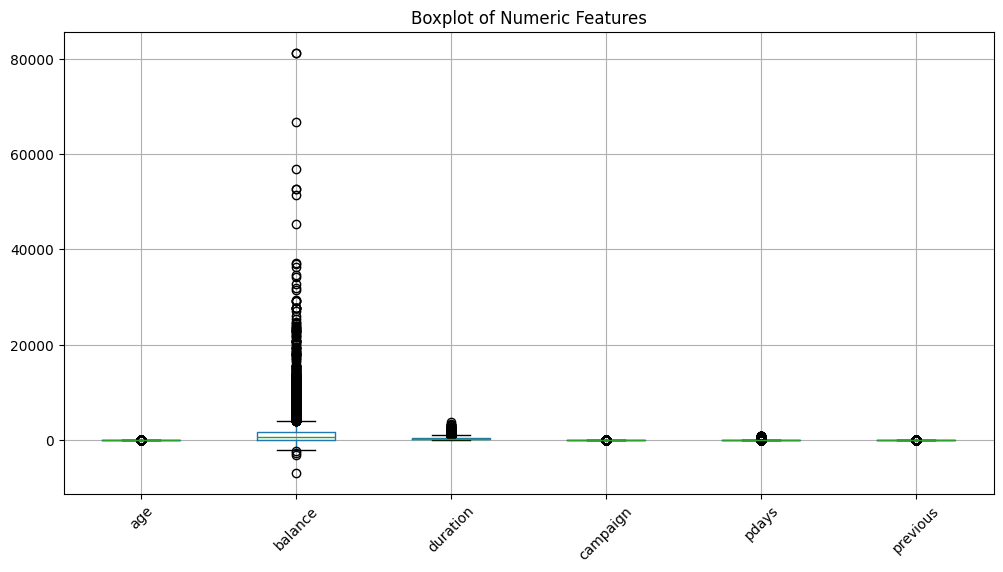

In [11]:
numeric_features = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
plt.figure(figsize=(12,6))
df[numeric_features].boxplot()
plt.xticks(rotation=45)
plt.title("Boxplot of Numeric Features")
plt.show()

### 5. Visualize Data After Dimension Reduction

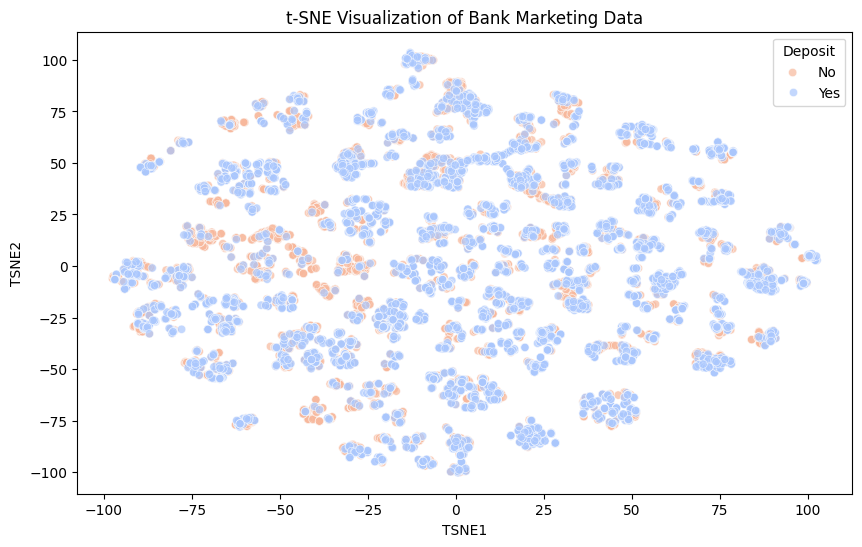

In [12]:
X = df.drop(columns=['deposit_yes'])
y = df['deposit_yes']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_embedded = tsne.fit_transform(X_scaled)

df_tsne = pd.DataFrame(X_embedded, columns=['TSNE1', 'TSNE2'])
df_tsne['deposit'] = y.values  # اضافه کردن متغیر هدف

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_tsne, x='TSNE1', y='TSNE2', hue='deposit', palette='coolwarm', alpha=0.7)
plt.title('t-SNE Visualization of Bank Marketing Data')
plt.legend(title="Deposit", labels=["No", "Yes"])
plt.show()


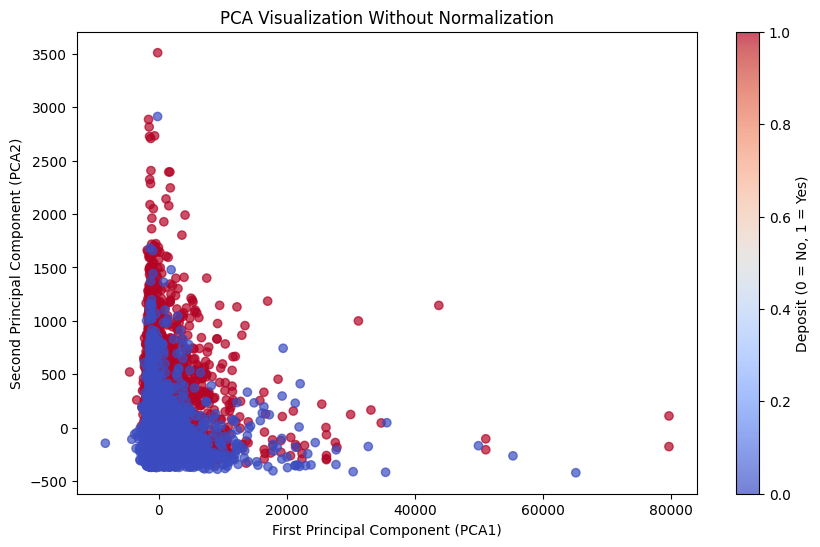

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

X = df.drop(columns=['deposit_yes'])
y = df['deposit_yes']

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

df_pca = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
df_pca['deposit'] = y.values  # اضافه کردن متغیر هدف برای رنگ‌بندی

plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_pca['PCA1'], df_pca['PCA2'], c=df_pca['deposit'], cmap='coolwarm', alpha=0.7)
plt.colorbar(scatter, label="Deposit (0 = No, 1 = Yes)")
plt.xlabel("First Principal Component (PCA1)")
plt.ylabel("Second Principal Component (PCA2)")
plt.title("PCA Visualization Without Normalization")
plt.show()

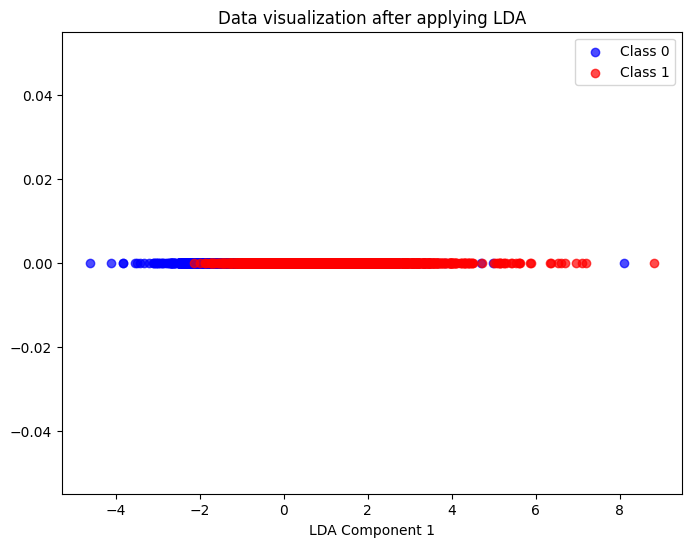

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)
X_lda = lda.fit_transform(X, y)

plt.figure(figsize=(8, 6))
plt.scatter(X_lda[y == 0], np.zeros_like(X_lda[y == 0]), color='blue', label='Class 0', alpha=0.7)
plt.scatter(X_lda[y == 1], np.zeros_like(X_lda[y == 1]), color='red', label='Class 1', alpha=0.7)

plt.legend()
plt.xlabel("LDA Component 1")
plt.title("Data visualization after applying LDA")
plt.show()


### Splitting Features (X) and Target Variable (y)

In [15]:
X = df.drop(columns=['deposit_yes'])
y = df['deposit_yes']

### Train and test split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Normalize the data

In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Adopt Dimensionality Reduction

In [18]:
#PCA
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print(f"Explained variance by each principal component: {pca.explained_variance_ratio_}")

Explained variance by each principal component: [9.85353110e-01 1.33071302e-02 1.32258331e-03 1.55413319e-05
 8.52131118e-07]


In [19]:
# LDA
lda = LDA(n_components=1)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

print(f"Explained variance by LDA: {lda.explained_variance_ratio_}")

Explained variance by LDA: [1.]


#### Apply SMOTE to balance classes

In [20]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(f"Class distribution after SMOTE:\n{pd.Series(y_train_resampled).value_counts(normalize=True)}")

Class distribution after SMOTE:
deposit_yes
False    0.5
True     0.5
Name: proportion, dtype: float64


#### Selecting important features with RandomForest

In [21]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
important_features = feature_importances.nlargest(10)

print("Top 10 Important Features:")
print(important_features)

Top 10 Important Features:
duration            0.368391
balance             0.122545
age                 0.110380
campaign            0.051571
pdays               0.037837
housing_yes         0.030224
poutcome_success    0.028738
contact_unknown     0.028377
previous            0.023799
contact_cellular    0.017040
dtype: float64


## Learning Models

### SVM

In [22]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
accuracy, precision, recall, f1, roc_auc = [], [], [], [], []

for train_index, test_index in kf.split(X_train):
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

    model = SVC(kernel='rbf', probability=True, random_state=42)
    model.fit(X_train_fold, y_train_fold)
    
    y_pred = model.predict(X_test_fold)
    y_prob = model.predict_proba(X_test_fold)[:, 1]
    
    accuracy.append(accuracy_score(y_test_fold, y_pred))
    precision.append(precision_score(y_test_fold, y_pred))
    recall.append(recall_score(y_test_fold, y_pred))
    f1.append(f1_score(y_test_fold, y_pred))
    roc_auc.append(roc_auc_score(y_test_fold, y_prob))

print('Average Accuracy: ', np.mean(accuracy), ' STD: ', np.std(accuracy))
print('Average Precision: ', np.mean(precision), ' STD: ', np.std(precision))
print('Average Recall: ', np.mean(recall), ' STD: ', np.std(recall))
print('Average F1: ', np.mean(f1), ' STD: ', np.std(f1))
print('Average ROC AUC: ', np.mean(roc_auc), ' STD: ', np.std(roc_auc))

Average Accuracy:  0.7400608530086167  STD:  0.006556792617678022
Average Precision:  0.7747785469075079  STD:  0.017263313395393057
Average Recall:  0.6362573844135815  STD:  0.016182431761615636
Average F1:  0.6985133739451637  STD:  0.011858077311751446
Average ROC AUC:  0.8236363776876818  STD:  0.010121648271399756


### Manually Combined Model: Random Forest and XGBoost

In [23]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
ensemble_model = VotingClassifier(estimators=[('rf', rf_model), ('gb', gb_model)], voting='soft')

accuracy, precision, recall, f1, roc_auc = [], [], [], [], []

for train_index, test_index in kf.split(X_train):
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

    ensemble_model.fit(X_train_fold, y_train_fold)
    
    y_pred = ensemble_model.predict(X_test_fold)
    y_prob = ensemble_model.predict_proba(X_test_fold)[:, 1]
    
    accuracy.append(accuracy_score(y_test_fold, y_pred))
    precision.append(precision_score(y_test_fold, y_pred))
    recall.append(recall_score(y_test_fold, y_pred))
    f1.append(f1_score(y_test_fold, y_pred))
    roc_auc.append(roc_auc_score(y_test_fold, y_prob))

print('Average Accuracy: ', np.mean(accuracy), ' STD: ', np.std(accuracy))
print('Average Precision: ', np.mean(precision), ' STD: ', np.std(precision))
print('Average Recall: ', np.mean(recall), ' STD: ', np.std(recall))
print('Average F1: ', np.mean(f1), ' STD: ', np.std(f1))
print('Average ROC AUC: ', np.mean(roc_auc), ' STD: ', np.std(roc_auc))


Average Accuracy:  0.823609022556391  STD:  0.013397985372465235
Average Precision:  0.7996736102631692  STD:  0.018933506352247925
Average Recall:  0.8380905799870382  STD:  0.012573911886805917
Average F1:  0.8182812722825779  STD:  0.012041681406330081
Average ROC AUC:  0.8981471827236692  STD:  0.009584134075883545


### Test Set

Test Set Evaluation:
Accuracy: 0.8294
Precision: 0.8074
Recall: 0.8403
F1 Score: 0.8235
ROC AUC: 0.8997

Classification Report:
               precision    recall  f1-score   support

       False       0.85      0.82      0.83      1175
        True       0.81      0.84      0.82      1058

    accuracy                           0.83      2233
   macro avg       0.83      0.83      0.83      2233
weighted avg       0.83      0.83      0.83      2233



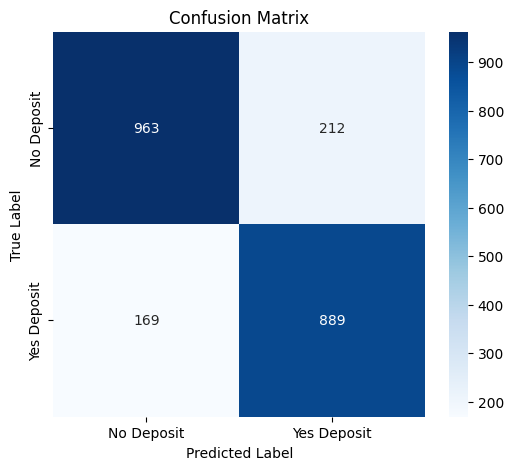

In [24]:
best_model = ensemble_model
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f"Test Set Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Deposit", "Yes Deposit"], yticklabels=["No Deposit", "Yes Deposit"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()